In [910]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE


# Training Dataset Preprocessing


In [911]:
train_dataset=pd.read_csv('./Datasets/train_data.csv')

In [912]:
train_dataset

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,Hyundai Verna 1.6 SX,Hyderabad,2012,83678,Diesel,Manual,First,22.32 kmpl,1582 CC,126.32 bhp,5.0,NaN,5.50
3495,Maruti Wagon R LXI BS IV,Pune,2010,91000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.30
3496,Maruti Ertiga SHVS ZDI Plus,Jaipur,2016,50000,Diesel,Manual,First,24.52 kmpl,1248 CC,88.5 bhp,7.0,NaN,8.70
3497,Hyundai Xcent 1.1 CRDi S Option,Delhi,2015,58000,Diesel,Manual,First,24.4 kmpl,1120 CC,71.01 bhp,5.0,NaN,4.95


In [913]:
train_dataset.describe()

,Year,Kilometers_Driven,Seats,Price
count,3499.000000,3.499000e+03,3474.000000,3499.000000
mean,2013.373821,5.979420e+04,5.291307,9.605247
std,3.223566,1.160794e+05,0.824893,11.250112
min,1998.000000,1.710000e+02,2.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.344200e+04,5.000000,5.650000
75%,2016.000000,7.303650e+04,5.000000,10.250000
max,2019.000000,6.500000e+06,10.000000,97.070000


In [914]:
nan_cols = train_dataset.isna().any()
print(nan_cols[nan_cols == True].index.tolist())


['Engine', 'Power', 'Seats', 'New_Price']


In [915]:
train_dataset.dropna(subset=['New_Price'],inplace=True)


In [916]:
train_dataset

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,Honda WRV i-VTEC VX,Ahmedabad,2017,32248,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,10.32 Lakh,8.25
3451,Hyundai Grand i10 1.2 Kappa Asta,Bangalore,2014,61325,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,8.1 Lakh,4.40
3465,Honda Amaze S Petrol,Jaipur,2014,69000,Petrol,Manual,First,19.5 kmpl,1199 CC,88.76 bhp,5.0,7.52 Lakh,4.50
3471,Volkswagen Vento 1.5 TDI Highline AT,Hyderabad,2016,45492,Diesel,Automatic,First,21.5 kmpl,1498 CC,108.5 bhp,5.0,15.68 Lakh,10.30


In [917]:
nan_cols = train_dataset.isna().any()
print(nan_cols[nan_cols == True].index.tolist())


[]


In [918]:
train_dataset['Fuel_Type_Encoded']=train_dataset['Fuel_Type'].astype('category').cat.codes
train_dataset['Transmission_Encoded']=train_dataset['Transmission'].astype('category').cat.codes

In [919]:
train_dataset

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Encoded,Transmission_Encoded
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,2,1
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,1,0
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95,2,1
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00,1,1
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,Honda WRV i-VTEC VX,Ahmedabad,2017,32248,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,10.32 Lakh,8.25,2,1
3451,Hyundai Grand i10 1.2 Kappa Asta,Bangalore,2014,61325,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,8.1 Lakh,4.40,2,1
3465,Honda Amaze S Petrol,Jaipur,2014,69000,Petrol,Manual,First,19.5 kmpl,1199 CC,88.76 bhp,5.0,7.52 Lakh,4.50,2,1
3471,Volkswagen Vento 1.5 TDI Highline AT,Hyderabad,2016,45492,Diesel,Automatic,First,21.5 kmpl,1498 CC,108.5 bhp,5.0,15.68 Lakh,10.30,1,0


In [920]:
print(train_dataset['Owner_Type'].unique())
print(train_dataset['Fuel_Type'].unique())
print(train_dataset['Transmission'].unique())

['First' 'Second' 'Third']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [921]:
train_dataset['Owner_Type_Encoded']=train_dataset['Owner_Type'].astype('category').cat.codes

In [922]:
train_dataset

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,2,1,0
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,1,0,0
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95,2,1,0
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00,1,1,0
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,Honda WRV i-VTEC VX,Ahmedabad,2017,32248,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,10.32 Lakh,8.25,2,1,0
3451,Hyundai Grand i10 1.2 Kappa Asta,Bangalore,2014,61325,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,8.1 Lakh,4.40,2,1,0
3465,Honda Amaze S Petrol,Jaipur,2014,69000,Petrol,Manual,First,19.5 kmpl,1199 CC,88.76 bhp,5.0,7.52 Lakh,4.50,2,1,0
3471,Volkswagen Vento 1.5 TDI Highline AT,Hyderabad,2016,45492,Diesel,Automatic,First,21.5 kmpl,1498 CC,108.5 bhp,5.0,15.68 Lakh,10.30,1,0,0


In [923]:
train_dataset['New_Price'] = train_dataset['New_Price'].str.replace('Lakh', '')
train_dataset['New_Price'] = train_dataset['New_Price'].str.replace('Cr', '')
train_dataset['Power'] = train_dataset['Power'].str.replace('bhp', '')
train_dataset['Engine'] = train_dataset['Engine'].str.replace('CC', '')
train_dataset['Mileage'] = train_dataset['Mileage'].str.replace('kmpl', '')
train_dataset['Mileage'] = train_dataset['Mileage'].str.replace('km/kg', '')
train_dataset['New_Price'] = train_dataset['New_Price'].str.strip()
train_dataset['Power'] = train_dataset['Power'].str.strip()
train_dataset['Engine'] = train_dataset['Engine'].str.strip()
train_dataset['Mileage'] = train_dataset['Mileage'].str.strip()

In [924]:
train_dataset

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50,2,1,0
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.5,8.0,21,17.50,1,0,0
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462,103.25,5.0,10.65,9.95,2,1,0
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5,2477,175.56,7.0,32.01,15.00,1,1,0
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995,190,5.0,47.87,18.55,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,Honda WRV i-VTEC VX,Ahmedabad,2017,32248,Petrol,Manual,First,17.5,1199,88.7,5.0,10.32,8.25,2,1,0
3451,Hyundai Grand i10 1.2 Kappa Asta,Bangalore,2014,61325,Petrol,Manual,First,18.9,1197,81.86,5.0,8.1,4.40,2,1,0
3465,Honda Amaze S Petrol,Jaipur,2014,69000,Petrol,Manual,First,19.5,1199,88.76,5.0,7.52,4.50,2,1,0
3471,Volkswagen Vento 1.5 TDI Highline AT,Hyderabad,2016,45492,Diesel,Automatic,First,21.5,1498,108.5,5.0,15.68,10.30,1,0,0


In [925]:
train_dataset.dtypes

Name                     object
Location                 object
Year                      int64
Kilometers_Driven         int64
Fuel_Type                object
Transmission             object
Owner_Type               object
Mileage                  object
Engine                   object
Power                    object
Seats                   float64
New_Price                object
Price                   float64
Fuel_Type_Encoded          int8
Transmission_Encoded       int8
Owner_Type_Encoded         int8
dtype: object

In [926]:
train_dataset['Mileage']=train_dataset['Mileage'].astype(float)
train_dataset['Engine']=train_dataset['Engine'].astype(float)
train_dataset['Power']=train_dataset['Power'].astype(float)
train_dataset['New_Price']=train_dataset['New_Price'].astype(float)

In [927]:
train_dataset.dtypes

Name                     object
Location                 object
Year                      int64
Kilometers_Driven         int64
Fuel_Type                object
Transmission             object
Owner_Type               object
Mileage                 float64
Engine                  float64
Power                   float64
Seats                   float64
New_Price               float64
Price                   float64
Fuel_Type_Encoded          int8
Transmission_Encoded       int8
Owner_Type_Encoded         int8
dtype: object

In [928]:
train_dataset=train_dataset.reset_index(drop=True)

In [929]:
train_dataset

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,2,1,0
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50,1,0,0
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10.65,9.95,2,1,0
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7.0,32.01,15.00,1,1,0
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,47.87,18.55,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Honda WRV i-VTEC VX,Ahmedabad,2017,32248,Petrol,Manual,First,17.50,1199.0,88.70,5.0,10.32,8.25,2,1,0
477,Hyundai Grand i10 1.2 Kappa Asta,Bangalore,2014,61325,Petrol,Manual,First,18.90,1197.0,81.86,5.0,8.10,4.40,2,1,0
478,Honda Amaze S Petrol,Jaipur,2014,69000,Petrol,Manual,First,19.50,1199.0,88.76,5.0,7.52,4.50,2,1,0
479,Volkswagen Vento 1.5 TDI Highline AT,Hyderabad,2016,45492,Diesel,Automatic,First,21.50,1498.0,108.50,5.0,15.68,10.30,1,0,0


# Preprocessing Function

In [930]:
def preprocess(df):
    # nan_cols = df.isna().any()
    # print("Empty Cols = ")
    # print(nan_cols[nan_cols == True].index.tolist())
    df.dropna(inplace=True)
    df['Fuel_Type_Encoded']=df['Fuel_Type'].astype('category').cat.codes
    df['Transmission_Encoded']=df['Transmission'].astype('category').cat.codes
    df['Owner_Type_Encoded']=df['Owner_Type'].astype('category').cat.codes
    df['New_Price'] = df['New_Price'].str.replace('Lakh', '')
    df['New_Price'] = df['New_Price'].str.replace('Cr', '')
    df['Power'] = df['Power'].str.replace('bhp', '')
    df['Engine'] = df['Engine'].str.replace('CC', '')
    df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
    df['Mileage'] = df['Mileage'].str.replace('km/kg', '')
    df['New_Price'] = df['New_Price'].str.strip()
    df['Power'] = df['Power'].str.strip()
    df['Engine'] = df['Engine'].str.strip()
    df['Mileage'] = df['Mileage'].str.strip()
    df['Mileage']=df['Mileage'].astype(float)
    df['Seats']=df['Seats'].astype(int)
    df['Engine']=df['Engine'].astype(float)
    df['Power']=df['Power'].astype(float)
    df['New_Price']=df['New_Price'].astype(float)
    df=df.reset_index(drop=True)
    return df

# Graphical Analysis and Correlations

In [931]:
traindf=preprocess(pd.read_csv('./Datasets/train_data.csv'))

In [932]:
traindf

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Encoded,Transmission_Encoded,Owner_Type_Encoded
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,8.61,4.50,2,1,0
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8,21.00,17.50,1,0,0
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5,10.65,9.95,2,1,0
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7,32.01,15.00,1,1,0
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5,47.87,18.55,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Honda WRV i-VTEC VX,Ahmedabad,2017,32248,Petrol,Manual,First,17.50,1199.0,88.70,5,10.32,8.25,2,1,0
477,Hyundai Grand i10 1.2 Kappa Asta,Bangalore,2014,61325,Petrol,Manual,First,18.90,1197.0,81.86,5,8.10,4.40,2,1,0
478,Honda Amaze S Petrol,Jaipur,2014,69000,Petrol,Manual,First,19.50,1199.0,88.76,5,7.52,4.50,2,1,0
479,Volkswagen Vento 1.5 TDI Highline AT,Hyderabad,2016,45492,Diesel,Automatic,First,21.50,1498.0,108.50,5,15.68,10.30,1,0,0


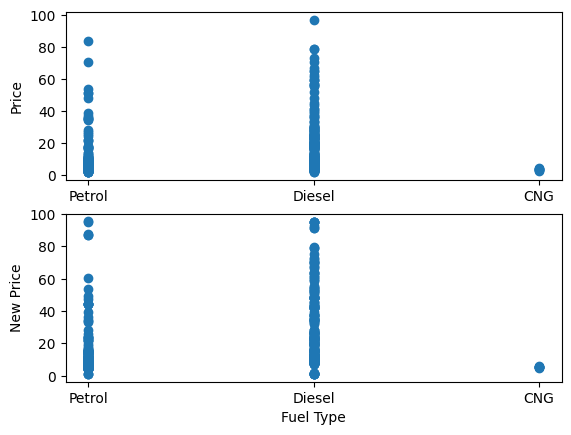

In [933]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(traindf['Fuel_Type'],traindf['Price'])
# ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Price')
ax2.scatter(traindf['Fuel_Type'],traindf['New_Price'])
# ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('New Price')
plt.xlabel("Fuel Type")
plt.show()

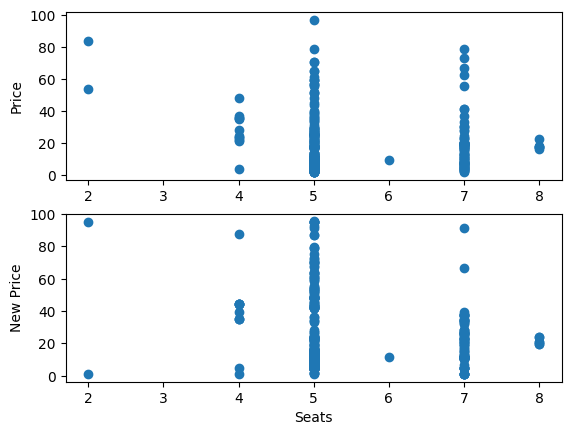

In [934]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(traindf['Seats'],traindf['Price'])
# ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Price')
ax2.scatter(traindf['Seats'],traindf['New_Price'])
# ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('New Price')
plt.xlabel("Seats")
plt.show()

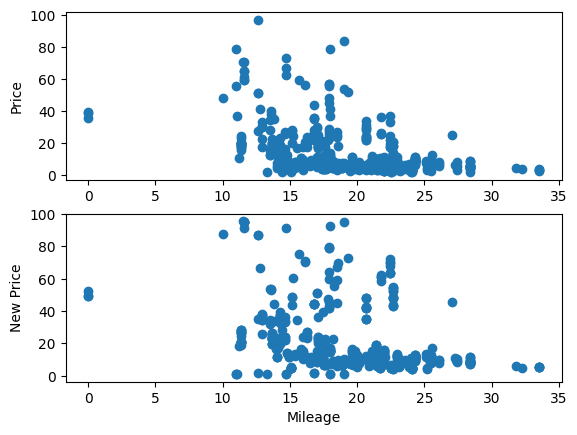

In [935]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(traindf['Mileage'],traindf['Price'])
# ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Price')
ax2.scatter(traindf['Mileage'],traindf['New_Price'])
# ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('New Price')
plt.xlabel("Mileage")
plt.show()

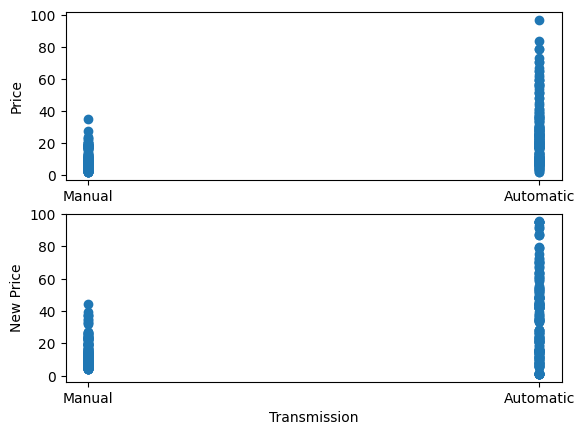

In [936]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(traindf['Transmission'],traindf['Price'])
# ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Price')
ax2.scatter(traindf['Transmission'],traindf['New_Price'])
# ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('New Price')
plt.xlabel("Transmission")
plt.show()

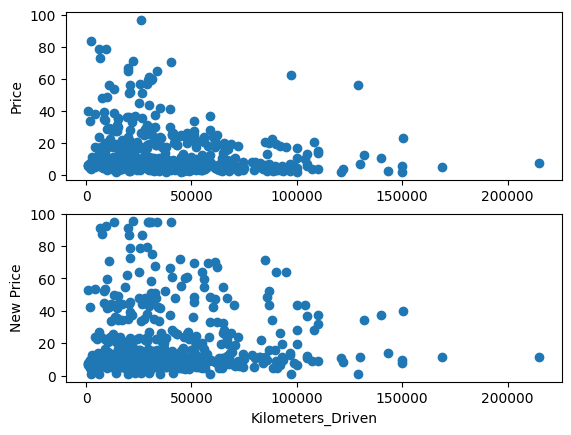

In [937]:
fig, (ax1,ax2) = plt.subplots(2, 1)
ax1.scatter(traindf['Kilometers_Driven'],traindf['Price'])
# sns.lmplot(x="Kilometers_Driven", y="Price", data=traindf)
# ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Price')
ax2.scatter(traindf['Kilometers_Driven'],traindf['New_Price'])
# sns.lmplot(x="Kilometers_Driven", y="New_Price", data=traindf)
# ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('New Price')
plt.xlabel("Kilometers_Driven")
plt.show()

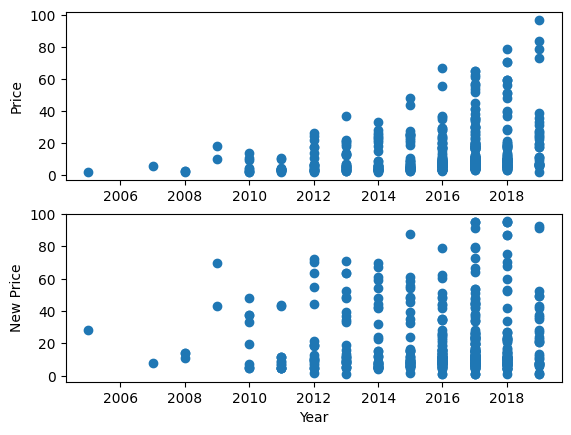

In [938]:
fig, (ax1,ax2) = plt.subplots(2, 1)
ax1.scatter(traindf['Year'],traindf['Price'])
# ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Price')
ax2.scatter(traindf['Year'],traindf['New_Price'])
# ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('New Price')
plt.xlabel("Year")
plt.show()

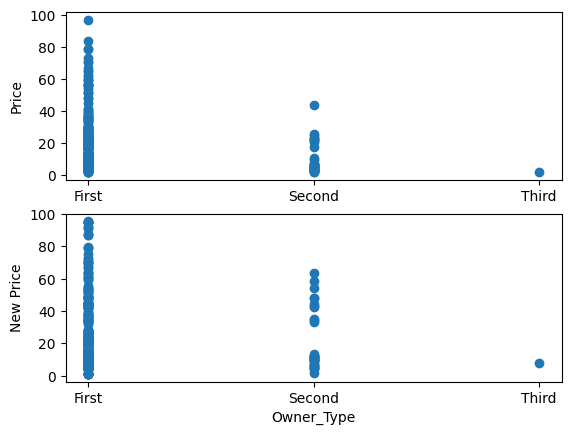

In [939]:
fig, (ax1,ax2) = plt.subplots(2, 1)
ax1.scatter(traindf['Owner_Type'],traindf['Price'])
# ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Price')
ax2.scatter(traindf['Owner_Type'],traindf['New_Price'])
# ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('New Price')
plt.xlabel("Owner_Type")
plt.show()

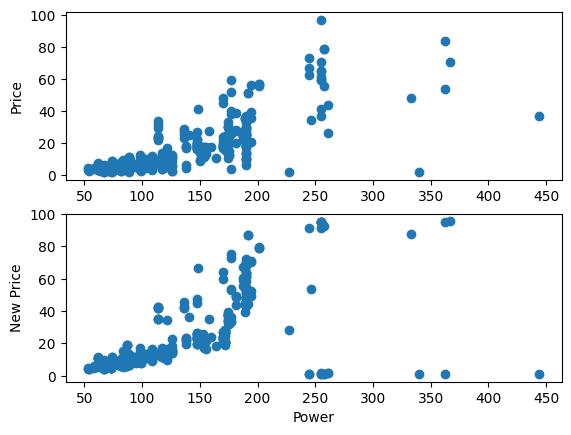

In [940]:
fig, (ax1,ax2) = plt.subplots(2, 1)
ax1.scatter(traindf['Power'],traindf['Price'])
# ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Price')
ax2.scatter(traindf['Power'],traindf['New_Price'])
# ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('New Price')
plt.xlabel("Power")
plt.show()

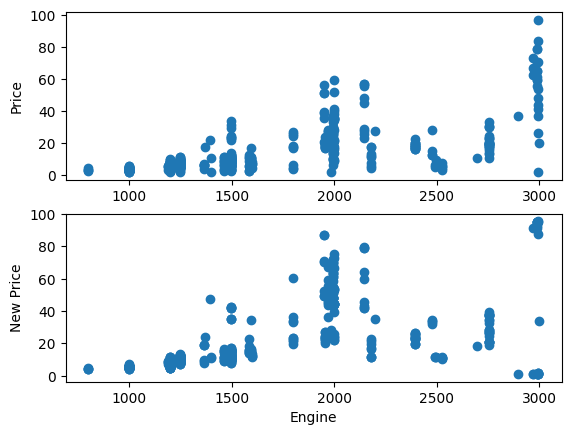

In [941]:
fig, (ax1,ax2) = plt.subplots(2, 1)
ax1.scatter(traindf['Engine'],traindf['Price'])
# ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Price')
ax2.scatter(traindf['Engine'],traindf['New_Price'])
# ax2.set_xlabel('Fuel Type')
ax2.set_ylabel('New Price')
plt.xlabel("Engine")
plt.show()

# Parameters that Matter (in Decreasing Order):-
1. Year
2. Transmission
3. Fuel Type
4. Owner Type
5. Km Driven
6. Mileage
7. Seats

# Feature Engineering

In [942]:
def calcAge(year):
    current_year = datetime.now().year
    return current_year-year

def norm(srs):
    scaler = MinMaxScaler()
    scaled_srs = scaler.fit_transform(srs.values.reshape(-1,1))
    return scaled_srs
    
def feature_engineering(df):
    df['Age']=df['Year'].apply(calcAge)
    df['Kilometers_Driven']=norm(df['Kilometers_Driven'])
    df['Engine']=norm(df["Engine"])
    df['Power']=norm(df["Power"])
    df['Mileage']=norm(df["Mileage"])
    df['Price_Drop']=df['New_Price']-df['Price']
    df['Price']=norm(df["Price"])
    df['Price_Drop']=norm(df["Price_Drop"])
    df['New_Price']=norm(df["New_Price"])
    df['Fuel_Type']=df['Fuel_Type_Encoded']
    df['Owner_Type']=df['Owner_Type_Encoded']
    df['Transmission']=df['Transmission_Encoded']
    df['Name']=df['Name'].str.extract('(\w+)')
    df['Name']=df['Name'].astype('category').cat.codes
    df.drop(['Transmission_Encoded','Owner_Type_Encoded','Fuel_Type_Encoded','Location','New_Price','Price','Year'],axis=1,inplace=True)
    return df

In [943]:
df=feature_engineering(traindf)
df['Name'].unique()

array([ 5, 21, 12, 15,  1, 22,  6, 13, 16, 20,  2,  0, 11, 19, 14,  8,  9,
        4, 18, 10, 23,  3,  7, 17], dtype=int8)

In [944]:
estimator = LinearRegression()
selector = RFECV(estimator, cv=10) # cv=5 specifies 5-fold cross-validation
train=df.drop('Price_Drop',axis=1,inplace=False)
# print(target)
# print(df)
selector.fit(train,df['Price_Drop'])

# selector.support_ contains a boolean mask of the selected features
selected_features = train.columns[selector.support_]

In [945]:
selected_features

Index(['Name', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Age'],
      dtype='object')

In [946]:
pca = PCA()
X_pca = pca.fit_transform(train)
df_pca = pd.DataFrame(data=X_pca)
df_pca
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.show()
variance_ratios = pca.explained_variance_ratio_
# print(np.sum(variance_ratios))
print(variance_ratios)
reduced_features = pca.transform(train)

# print the reduced features
print(reduced_features.shape)

[8.60044323e-01 1.11666845e-01 1.52582724e-02 5.73413044e-03
 4.65862251e-03 1.37294221e-03 8.58737750e-04 2.46417024e-04
 1.10937087e-04 4.87724241e-05]
(481, 10)


In [952]:
corr_matrix = df.corr()

# extract correlation between features and target variable
corr_with_target = corr_matrix.iloc[:-1,-1]

# print the correlations in descending order
print(corr_with_target.sort_values(ascending=False))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
# plt.show()


Age                  0.251225
Power                0.172079
Kilometers_Driven    0.136410
Engine               0.098899
Owner_Type           0.068593
Mileage             -0.028673
Seats               -0.106708
Fuel_Type           -0.134136
Name                -0.134730
Transmission        -0.246222
Name: Price_Drop, dtype: float64


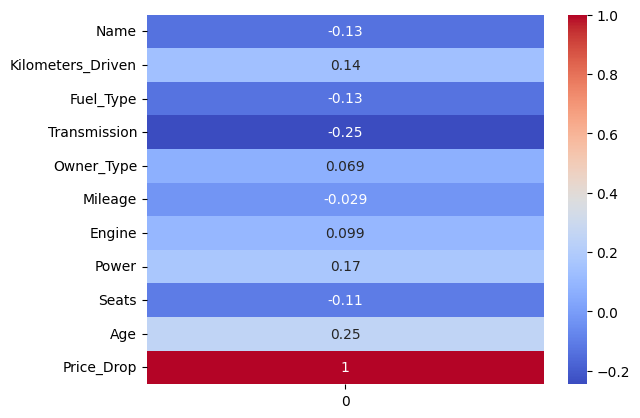

In [951]:
corr_matrix = df.corrwith(df['Price_Drop'])

# Plot the heatmap
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm')
plt.show()

Mutual information scores:
 [0.53001357 0.10977453 0.09398647 0.21510794 0.         0.37716583
 0.5879512  0.64112046 0.08478832 0.13571082]


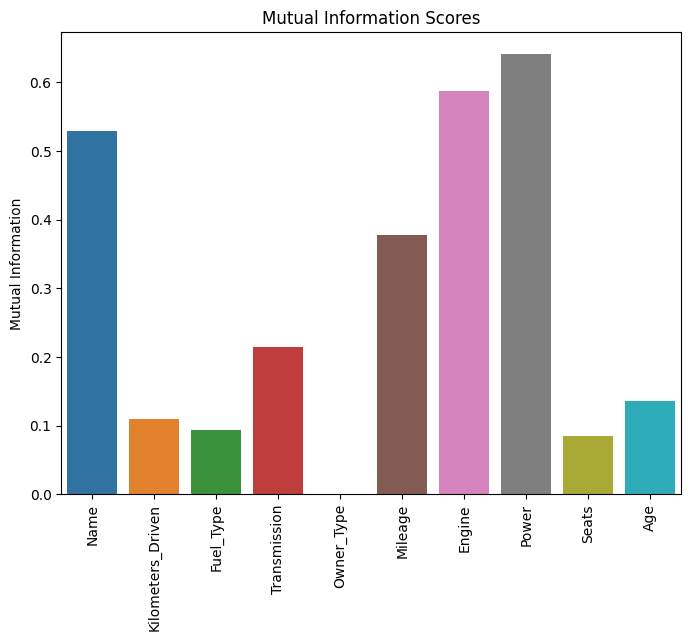

In [949]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(df.drop('Price_Drop', axis=1), df['Price_Drop'])
print('Mutual information scores:\n', mi_scores)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=df.drop('Price_Drop',axis=1).columns, y=mi_scores, ax=ax)
ax.set_title('Mutual Information Scores')
ax.set_ylabel('Mutual Information')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()